In [0]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

import os
import zlib
import zipfile

import matplotlib.pyplot as plt
import matplotlib.image as mpimage
%matplotlib inline


In [2]:
!wget --no-check-certificate \
  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
  -O /tmp/cats_and_dogs_filtered.zip

--2019-04-28 09:56:14--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.128, 2607:f8b0:4001:c01::80
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   124MB/s    in 0.5s    

2019-04-28 09:56:20 (124 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [0]:
local_zip='/tmp/cats_and_dogs_filtered.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall()
zip_.close()

In [0]:
base_dir = '/content/cats_and_dogs_filtered'

train_dir = os.path.join(base_dir, 'train')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_dir = os.path.join(base_dir, 'validation')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [0]:
def plot_images(item_dir, top=25):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir,file) for file in all_item_dirs][:top]

  plt.figure(figsize=(10,10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5,5,idx+1)
    img = mpimage.imread(img_path)
    plt.imshow(img)

  plt.tight_layout()

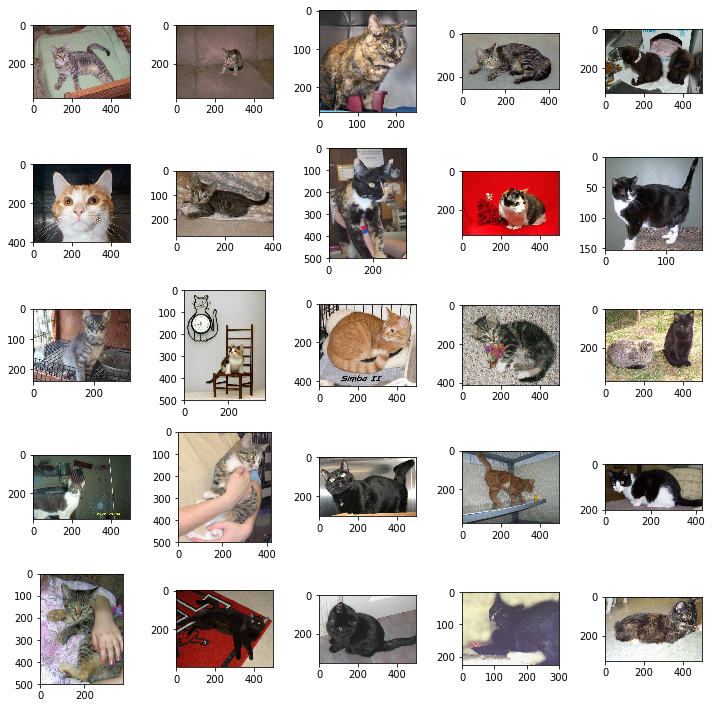

In [6]:
plot_images(train_cats_dir)

In [7]:
#Budowanie architektury modelu
input_shape = (150,150,3)

model = Sequential([
    Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape =input_shape ),
    #Conv2D(filters=32, kernel_size=(3,3),activation='relu' ),
    MaxPool2D(pool_size=(2,2)),
    #Dropout(0.25),
    
    Conv2D(filters=64, kernel_size=(3,3),activation='relu' ),
    #Conv2D(filters=64, kernel_size=(3,3),activation='relu' ),
    MaxPool2D(pool_size=(2,2)),
    #Dropout(0.25),
    
    Conv2D(filters=128, kernel_size=(3,3),activation='relu' ),
    MaxPool2D(pool_size=(2,2)),
    #Dropout(0.25),
    
    Flatten(),    
    #Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

#model.summary()
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#normalizacja danych
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

In [9]:
train_generator = train_datagen.flow_from_directory(
  train_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary')

validation_generator = train_datagen.flow_from_directory(
  validation_dir,
  target_size=(150,150),
  batch_size=20,
  class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=50,
    verbose=2
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
50/50 [==============================] - 3s 64ms/step - loss: 0.6710 - acc: 0.5100
 - 12s - loss: 0.6863 - acc: 0.5405 - val_loss: 0.6710 - val_acc: 0.5100
Epoch 2/5
50/50 [==============================] - 4s 73ms/step - loss: 0.6241 - acc: 0.6410
 - 9s - loss: 0.6312 - acc: 0.6390 - val_loss: 0.6241 - val_acc: 0.6410
Epoch 3/5
50/50 [==============================] - 3s 63ms/step - loss: 0.5904 - acc: 0.7060
 - 9s - loss: 0.5730 - acc: 0.7010 - val_loss: 0.5904 - val_acc: 0.7060
Epoch 4/5
50/50 [==============================] - 3s 63ms/step - loss: 0.5497 - acc: 0.7220
 - 8s - loss: 0.5229 - acc: 0.7240 - val_loss: 0.5497 - val_acc: 0.7220
Epoch 5/5
50/50 [==============================] - 3s 63ms/step - loss: 0.5564 - acc: 0.7220
 - 8s - loss: 0.5041 - acc: 0.7520 - val_loss: 0.5564 - val_acc: 0.7220
